# CIS 434- Lab 1
## Objectives: 
### 1. Python basics
   * Working with strings in Python 
   * Pandas
   * Working with csv files 
   * pre-processing strings 
       
### 2. Overfitting problems 
   * Machine Learning and Train-test Split
   * Model Selection 
*** 
***

### Case Scenario: Olympics tweets 

In [1]:
from IPython.display import Image
Image(url= "./lab1_1.jpeg", width=400, height=400)

* Say, you are a markting intern at a media broadcasting company. 
* You are assigned the task to study the general public's sentiment on the Tokyo Olympic/Paralympic games 
* You scraped a subset of 10,000 tweets with the hashtag "Tokyo2020"
    * Twitter scraping tutorial is under "Lab_0_Get Twitter Data.ipynb", feel free to check it out
    
    
* There are many valuable things you can get from these tweets:
    * What games are the most popular, most controversial? 
    * What are the trending keywords? 
    * What are some topics people are talking about? 
    
    
* First, we'll go over learn how to process these tweets.
*** 
*** 

## Part 1: python basics

### 1.1 Working with CSV files using Pandas
* We use Pandas to handle our scraped data table.
* Pandas allow us to read in an excel file and save as a dataframe object. 
***

* Pandas 
  - Load csv file into pandas DataFrame using [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
      - df = pd.read_csv('data1.csv')
      - Missing header: pd.read_csv("data2.csv", header=None, names=['Language','Wiki','Articles','Pages','Edits'])

  - Export DataFrame to csv file using [to_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html): 
    - df.to_csv('data_out.csv')
    - Subset of columns, indices, separator, ...
***
* CSV
    * Comma-Separated Values
    * Text files that represent tables 
    * Content of a dataframe: 
    * Columns are separated by commas, rows by newlines (lines breaks)		
    * Often the first row contains the column titles (header)
***
* DataFrame
    * We use Represent tables 
        * collection of same size columns / Series
        * columns are homogeneous
    * [Initialization](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe): dict of arrays, lists or tuples; dict of series; dict of dicts; list of dicts or series; list of lists; from another dataframe
    item Attributes: df.index, df.dtypes, df.columns, df.values, df.shape
    * Column selection:  df['a']
    * Column addition:  df['new']=0, df['new']=df['a']+df['b'], df['new']=s, df['new']=[7,8,9], df.insert(3,'new',[10,11,12])
    * Delete column:  del df['new']
***

In [2]:
# import the pandas package and name it "pd"
import pandas as pd

In [3]:
# read in the csv file and save as a data frame
df = pd.read_csv('olympic tweets.csv')

# check out the first 5 rows of our data
df.head(5)

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,johangreg,Looking for opportunities outside of Alberta. ...,"Calgary, Alberta",1679,3829,796775,10,28 August - #ParaSwimming - Mixed 4x100m Frees...,"['ParaSwimming', 'UnitedByEmotion']"
1,1,sayani181,Only thing I wish for is to disappear one day ...,NaN,340,212,28290,915,Now we #GoForGold!!! @BhavinaPatel6 is through...,"['GoForGold', 'TableTennis', 'CHN']"
2,2,namtiddy,"21 | ele/dele (PT-BR), he/him, they/them (ENG)...",LIKE DO-MI-NO!,599,74,20700,34,Rayssa Leal used to be known as a #skateboardi...,['skateboarding']
3,3,Bianca_Hini,.,"Pretoria, South Africa",3814,3911,12112,266,Jumping into the record books like... 😁\n\nNta...,['RSA']
4,4,Sportths,NaN,NaN,104,288,3295,22,ANOTHER GOLD FOR MAISIE SUMMERS-NEWTON! 🥇 😍\n\...,[]


### What do we see here? 
* What does the data contain? 
    * the poster's information: 
        - name
        - profile
        - location
        - number of following and followers 
        - total tweets count and retweet count 
    
    * text of the tweet: 
        - text
        - hashtag 
    
    
* Does the data look "clean"? 
    * How many different columns are there for our data? 
        * what is the type of each column?  
    * How many languages are used? 
        * Are there any emojis?
        * Are there any URLs used? 

In [4]:
# list all columns
df.columns 

Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'],
      dtype='object')

In [5]:
# return the type of each column
df.dtypes 

Unnamed: 0       int64
username        object
description     object
location        object
following        int64
followers        int64
totaltweets      int64
retweetcount     int64
text            object
hashtags        object
dtype: object

### 1.2 String manipulation: 

* For now, lets take a look at a single tweet and learn about string in python 

In [6]:
# df['column name here'] gives us a series of all cells in that column
df['text']

0       28 August - #ParaSwimming - Mixed 4x100m Frees...
1       Now we #GoForGold!!! @BhavinaPatel6 is through...
2       Rayssa Leal used to be known as a #skateboardi...
3       Jumping into the record books like... 😁\n\nNta...
4       ANOTHER GOLD FOR MAISIE SUMMERS-NEWTON! 🥇 😍\n\...
                              ...                        
9995    The new Men's Parallel Bars champion...Zou Jin...
9996    It's a first gold for Mexico in the Men's 150m...
9997    #BREAKING 🥇 Lisa Adams wins GOLD at the #Tokyo...
9998    What. A. Team! 💚💛\n\nOur Aussie Mixed 4x100m F...
9999    #BREAKING: Gold for Lisa Adams in the women’s ...
Name: text, Length: 10000, dtype: object

In [7]:
# lets check out one tweet: 
df['text'][1]

'Now we #GoForGold!!! @BhavinaPatel6 is through to the FINALS #TableTennis 🏓🔥🔥🔥🎉🎉🎉🎉🎉 After beating World no. 3 #CHN today, #BhavinaPatel will be seen in #Tokyo2020 #Paralympics FINALS tomorrow morning!!! https://t.co/V8hMgst5wi'

In [8]:
# what the tweet looks printed out: 
print(df['text'][2])

Rayssa Leal used to be known as a #skateboarding internet sensation who performed tricks in a tutu at seven-years-old.

But in 2021, the 13-year-old silver medallist from #Tokyo2020 became the youngest Olympic medalist in 85 years. 🥈

#ShiningStars | @rayssaleal | @cbskoficial


In [9]:
# converting the tweet to a string: 
s = str(df['text'][2])
s

'Rayssa Leal used to be known as a #skateboarding internet sensation who performed tricks in a tutu at seven-years-old.\n\nBut in 2021, the 13-year-old silver medallist from #Tokyo2020 became the youngest Olympic medalist in 85 years. 🥈\n\n#ShiningStars | @rayssaleal | @cbskoficial'

In [10]:
# length of the string:
len(s)

277

In [11]:
# count the number of spaces:
s.count(' ')

39

In [12]:
# get substring: get the first 11 characters
print (s[0:11])

Rayssa Leal


In [13]:
# split strings by space into a list of words 
s.split(' ')

['Rayssa',
 'Leal',
 'used',
 'to',
 'be',
 'known',
 'as',
 'a',
 '#skateboarding',
 'internet',
 'sensation',
 'who',
 'performed',
 'tricks',
 'in',
 'a',
 'tutu',
 'at',
 'seven-years-old.\n\nBut',
 'in',
 '2021,',
 'the',
 '13-year-old',
 'silver',
 'medallist',
 'from',
 '#Tokyo2020',
 'became',
 'the',
 'youngest',
 'Olympic',
 'medalist',
 'in',
 '85',
 'years.',
 '🥈\n\n#ShiningStars',
 '|',
 '@rayssaleal',
 '|',
 '@cbskoficial']

In [14]:
# replace next line symbol "\n" with space:
s = s.replace("\n", " ")
s

'Rayssa Leal used to be known as a #skateboarding internet sensation who performed tricks in a tutu at seven-years-old.  But in 2021, the 13-year-old silver medallist from #Tokyo2020 became the youngest Olympic medalist in 85 years. 🥈  #ShiningStars | @rayssaleal | @cbskoficial'

In [15]:
# upper case to lower case; lower to upper
#s.lower()
s.upper()

'RAYSSA LEAL USED TO BE KNOWN AS A #SKATEBOARDING INTERNET SENSATION WHO PERFORMED TRICKS IN A TUTU AT SEVEN-YEARS-OLD.  BUT IN 2021, THE 13-YEAR-OLD SILVER MEDALLIST FROM #TOKYO2020 BECAME THE YOUNGEST OLYMPIC MEDALIST IN 85 YEARS. 🥈  #SHININGSTARS | @RAYSSALEAL | @CBSKOFICIAL'

In [16]:
# functions in python:
def test_funciton(string):
    return ( "this funciton capitalizes the string: " + string.upper())

In [17]:
s

'Rayssa Leal used to be known as a #skateboarding internet sensation who performed tricks in a tutu at seven-years-old.  But in 2021, the 13-year-old silver medallist from #Tokyo2020 became the youngest Olympic medalist in 85 years. 🥈  #ShiningStars | @rayssaleal | @cbskoficial'

In [18]:
test_funciton(s)

'this funciton capitalizes the string: RAYSSA LEAL USED TO BE KNOWN AS A #SKATEBOARDING INTERNET SENSATION WHO PERFORMED TRICKS IN A TUTU AT SEVEN-YEARS-OLD.  BUT IN 2021, THE 13-YEAR-OLD SILVER MEDALLIST FROM #TOKYO2020 BECAME THE YOUNGEST OLYMPIC MEDALIST IN 85 YEARS. 🥈  #SHININGSTARS | @RAYSSALEAL | @CBSKOFICIAL'

### 1.3 Preprocessing Text

In [19]:
# the text we want to process: 
df['text']

0       28 August - #ParaSwimming - Mixed 4x100m Frees...
1       Now we #GoForGold!!! @BhavinaPatel6 is through...
2       Rayssa Leal used to be known as a #skateboardi...
3       Jumping into the record books like... 😁\n\nNta...
4       ANOTHER GOLD FOR MAISIE SUMMERS-NEWTON! 🥇 😍\n\...
                              ...                        
9995    The new Men's Parallel Bars champion...Zou Jin...
9996    It's a first gold for Mexico in the Men's 150m...
9997    #BREAKING 🥇 Lisa Adams wins GOLD at the #Tokyo...
9998    What. A. Team! 💚💛\n\nOur Aussie Mixed 4x100m F...
9999    #BREAKING: Gold for Lisa Adams in the women’s ...
Name: text, Length: 10000, dtype: object

In [20]:
# packages we will use (don't be intimidated by them)
import pandas as pd
import numpy as np
from textblob import TextBlob
#import flair
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
import string 
import re 
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')

In [21]:
# functions to filter text
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text
# make all text lowercase
def text_lowercase(text):
    return text.lower()
# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [22]:
pp_text_train = [] # our preprocessed text column
for text_data in df['text']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
df['pp_text'] = pp_text_train 

In [23]:
df.head(2)

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,pp_text
0,0,johangreg,Looking for opportunities outside of Alberta. ...,"Calgary, Alberta",1679,3829,796775,10,28 August - #ParaSwimming - Mixed 4x100m Frees...,"['ParaSwimming', 'UnitedByEmotion']",august paraswimming mixed xm freestyle relay g...
1,1,sayani181,Only thing I wish for is to disappear one day ...,NaN,340,212,28290,915,Now we #GoForGold!!! @BhavinaPatel6 is through...,"['GoForGold', 'TableTennis', 'CHN']",goforgold final tabletennis beating world chn ...


In [24]:
df['text'][1]

'Now we #GoForGold!!! @BhavinaPatel6 is through to the FINALS #TableTennis 🏓🔥🔥🔥🎉🎉🎉🎉🎉 After beating World no. 3 #CHN today, #BhavinaPatel will be seen in #Tokyo2020 #Paralympics FINALS tomorrow morning!!! https://t.co/V8hMgst5wi'

In [25]:
df['pp_text'][1]

'goforgold final tabletennis beating world chn today bhavinapatel seen tokyo paralympics final tomorrow morning'

In [26]:
corpus = list(df['pp_text'])

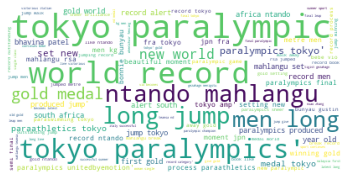

In [27]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordcloud.png", dpi=900)

In [28]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [29]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['august',
 'paraswimming',
 'mixed',
 'xm',
 'freestyle',
 'relay',
 'great',
 'britain',
 'australia',
 'brazil']

          Keyword  Frequency
0           tokyo       9862
1     paralympics       7264
2            gold       5403
3          record       3527
4           world       2918
5           medal       2624
6             men       2560
7            jump       2307
8           final       2225
9            long       1648
10         ntando       1464
11       mahlangu       1455
12          woman       1322
13  paraathletics       1295
14     paralympic       1269
15          first       1245
16            new       1191
17         bronze       1035
18            win        995
19         silver        914


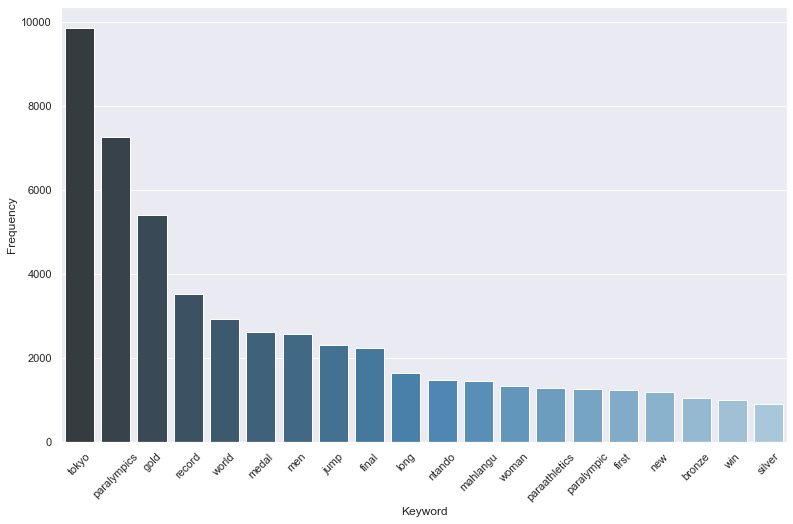

In [30]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv('_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig("_keyword.png", bbox_inches = "tight")

                 Bi-gram  Frequency
0      tokyo paralympics       4721
1           world record       2550
2        ntando mahlangu       1453
3              long jump       1428
4               men long       1390
5             gold medal       1269
6      paralympics tokyo       1188
7              new world        860
8    paraathletics tokyo        729
9                set new        662
10           medal tokyo        582
11            record men        516
12          south africa        491
13            gold world        489
14          record alert        486
15            jump tokyo        476
16          mahlangu set        471
17           alert south        470
18         africa ntando        470
19  paralympics produced        470


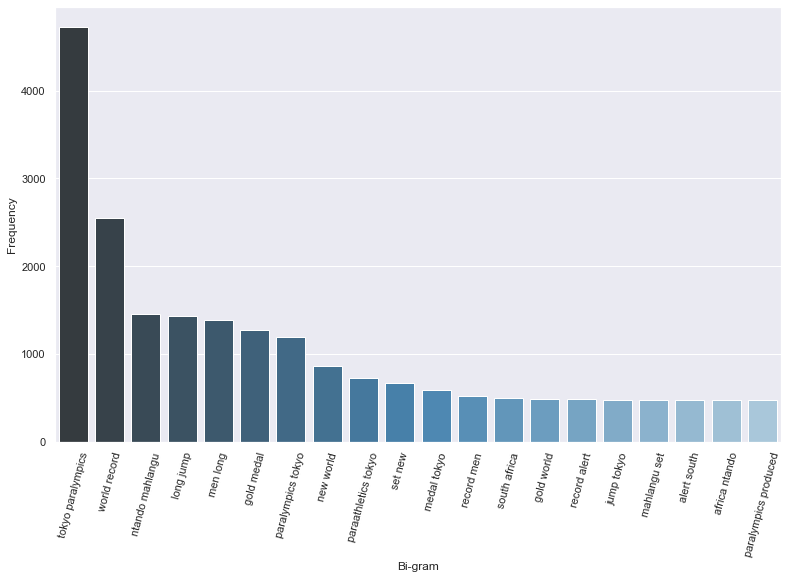

In [31]:
#biagram:

# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv('_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig("_bi-gram.png", bbox_inches = "tight")

                             Tri-gram  Frequency
0                       men long jump       1390
1                    new world record        839
2     paraathletics tokyo paralympics        581
3                       set new world        512
4                    world record men        492
5                   gold world record        489
6                  world record alert        477
7                     record men long        476
8                     long jump tokyo        476
9              jump tokyo paralympics        473
10                ntando mahlangu set        471
11                 record alert south        470
12                 alert south africa        470
13                south africa ntando        470
14             africa ntando mahlangu        470
15                   mahlangu set new        470
16         tokyo paralympics produced        470
17          paralympics produced jump        470
18  tokyo paralympics unitedbyemotion        367
19        process pa

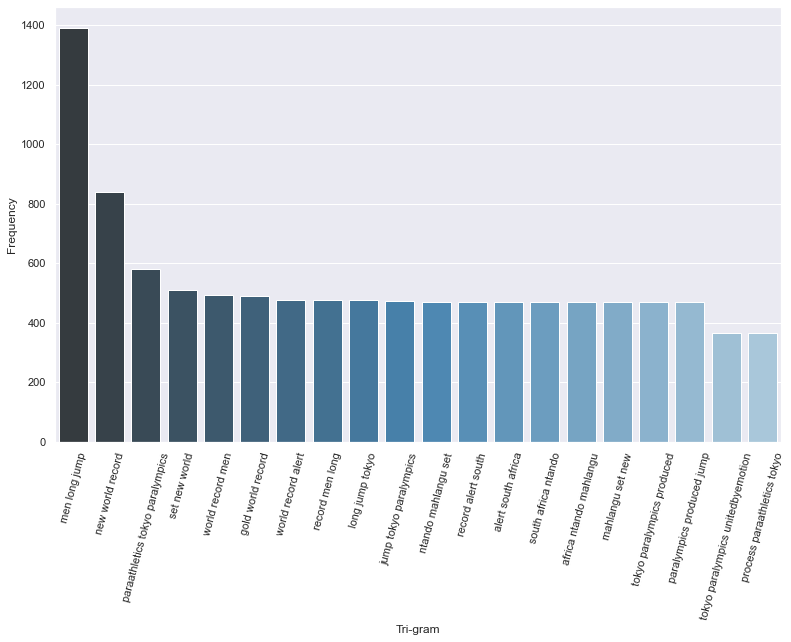

In [32]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
top3_df.to_csv( '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig("_tri-gram.png", bbox_inches = "tight")